GROUP ASSIGNMENT - Puck de Bruin (1665650), ...

First, install packages

In [45]:
import pandas as pd 
from rdkit.Chem import AllChem
from rdkit import Chem 
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

Read cvs file 

In [46]:
df = pd.read_csv('tested_molecules-1.csv')
df

,SMILES,ALDH1_inhibition
0,COc1ccccc1CC(NC(C)=O)C(=O)NC1CCN(c2nnnn2-c2ccc...,1
1,O=C(CSc1nc2cccnc2n1Cc1ccccc1)NCc1ccco1,1
2,Cc1cccc2cc(C[NH+](CC3CCCO3)C(c3nnnn3Cc3ccco3)C...,1
3,CCN(CC)c1ccc2c(Cl)c(Br)c(=O)oc2c1,1
4,CS(=O)(=O)N1CCc2cc(-c3csc(NC(=O)Cc4cccs4)n3)ccc21,1
...,...,...
995,COc1ccc(N2C(=O)CC([NH2+]C3CC3)C2=O)cc1,0
996,CCNc1oc(COc2cccc(C)c2)nc1C#N,0
997,NC(=O)Cn1cnc(-c2ccccc2)c1,0
998,Cc1cc(NC(=O)CSc2nc3c(c(=O)n(C)c(=O)n3C)n2C(C)C...,0


Next step is determining which descriptors we are going to use. 

In [47]:
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors

In [48]:
def RDkit_descriptors(smiles):
    mols = [Chem.MolFromSmiles(i) for i in smiles]
    calc = MoleculeDescriptors.MolecularDescriptorCalculator([x[0] for x in Descriptors._descList])
    desc_names = calc.GetDescriptorNames()
    
    Mol_descriptors = []
    for mol in mols:
        mol=Chem.AddHs(mol)
        descriptors = calc.CalcDescriptors(mol)
        Mol_descriptors.append(descriptors)
    return Mol_descriptors, desc_names

Mol_descriptors, desc_names = RDkit_descriptors(df['SMILES'])

In [49]:
df_with_descriptors = pd.DataFrame(Mol_descriptors, columns=desc_names)
df_with_descriptors

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,14.648724,14.648724,0.060465,-5.034549,0.520365,463.542,434.310,463.233188,178,0,...,0,0,0,0,1,0,0,0,0,0
1,13.180567,13.180567,0.259504,-3.442212,0.498564,378.457,360.313,378.115047,136,0,...,1,0,0,0,0,0,0,0,0,0
2,10.154031,10.154031,0.626646,-5.536518,0.382043,477.589,444.325,477.260865,184,0,...,0,0,0,0,1,0,0,0,0,0
3,11.964559,11.964559,0.338689,-3.767788,0.795948,330.609,317.505,328.981818,96,0,...,0,0,0,0,0,0,0,0,0,0
4,12.970682,12.970682,0.107779,-5.727217,0.687618,419.553,402.417,419.043204,140,0,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,13.321060,13.321060,0.375171,-4.083179,0.779148,261.301,244.165,261.123369,100,0,...,0,0,0,0,0,0,0,0,0,0
996,9.208764,9.208764,0.332844,-3.398454,0.891297,257.293,242.173,257.116427,98,0,...,0,0,0,0,0,0,0,0,0,0
997,11.703757,11.703757,0.168127,-3.184275,0.805927,201.229,190.141,201.090212,76,0,...,0,0,0,0,0,0,0,0,0,0
998,13.524189,13.524189,0.335914,-4.130319,0.644831,392.441,372.281,392.126674,144,0,...,1,0,0,0,0,0,0,0,0,0


In [50]:
merged_df = df.join(df_with_descriptors)
merged_df

,SMILES,ALDH1_inhibition,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,COc1ccccc1CC(NC(C)=O)C(=O)NC1CCN(c2nnnn2-c2ccc...,1,14.648724,14.648724,0.060465,-5.034549,0.520365,463.542,434.310,463.233188,...,0,0,0,0,1,0,0,0,0,0
1,O=C(CSc1nc2cccnc2n1Cc1ccccc1)NCc1ccco1,1,13.180567,13.180567,0.259504,-3.442212,0.498564,378.457,360.313,378.115047,...,1,0,0,0,0,0,0,0,0,0
2,Cc1cccc2cc(C[NH+](CC3CCCO3)C(c3nnnn3Cc3ccco3)C...,1,10.154031,10.154031,0.626646,-5.536518,0.382043,477.589,444.325,477.260865,...,0,0,0,0,1,0,0,0,0,0
3,CCN(CC)c1ccc2c(Cl)c(Br)c(=O)oc2c1,1,11.964559,11.964559,0.338689,-3.767788,0.795948,330.609,317.505,328.981818,...,0,0,0,0,0,0,0,0,0,0
4,CS(=O)(=O)N1CCc2cc(-c3csc(NC(=O)Cc4cccs4)n3)ccc21,1,12.970682,12.970682,0.107779,-5.727217,0.687618,419.553,402.417,419.043204,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,COc1ccc(N2C(=O)CC([NH2+]C3CC3)C2=O)cc1,0,13.321060,13.321060,0.375171,-4.083179,0.779148,261.301,244.165,261.123369,...,0,0,0,0,0,0,0,0,0,0
996,CCNc1oc(COc2cccc(C)c2)nc1C#N,0,9.208764,9.208764,0.332844,-3.398454,0.891297,257.293,242.173,257.116427,...,0,0,0,0,0,0,0,0,0,0
997,NC(=O)Cn1cnc(-c2ccccc2)c1,0,11.703757,11.703757,0.168127,-3.184275,0.805927,201.229,190.141,201.090212,...,0,0,0,0,0,0,0,0,0,0
998,Cc1cc(NC(=O)CSc2nc3c(c(=O)n(C)c(=O)n3C)n2C(C)C...,0,13.524189,13.524189,0.335914,-4.130319,0.644831,392.441,372.281,392.126674,...,1,0,0,0,0,0,0,0,0,0


Scale the data with MinMax scaling

In [51]:
minmax = MinMaxScaler()
df_minmax = minmax.fit_transform(df_with_descriptors)
df_minmax = pd.DataFrame(df_minmax, columns=desc_names)
display(df_minmax)


,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0.859250,0.859250,0.018843,0.388024,0.492906,0.688495,0.667061,0.688303,0.756098,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.681800,0.681800,0.081648,0.597422,0.466743,0.501554,0.501533,0.501222,0.500000,0.0,...,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.315993,0.315993,0.197498,0.322013,0.326910,0.719358,0.689464,0.719134,0.792683,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.534825,0.534825,0.106635,0.554608,0.823627,0.396428,0.405774,0.393233,0.256098,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.656432,0.656432,0.033772,0.296936,0.693622,0.591847,0.595718,0.591178,0.524390,0.0,...,0.0,0.5,0.0,0.0,0.0,1.0,0.0,0.5,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.698781,0.698781,0.118146,0.513133,0.803465,0.244151,0.241716,0.244087,0.280488,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.201742,0.201742,0.104790,0.603176,0.938052,0.235345,0.237260,0.235281,0.268293,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.503303,0.503303,0.052815,0.631342,0.835602,0.112166,0.120867,0.112141,0.134146,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.723332,0.723332,0.105759,0.506933,0.642275,0.532279,0.528305,0.532018,0.548780,0.0,...,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Determine how many principal components are needed for the analysis

,0
1,0.197956
2,0.305549
3,0.365136
4,0.411833
5,0.451740
...,...
205,1.000000
206,1.000000
207,1.000000
208,1.000000


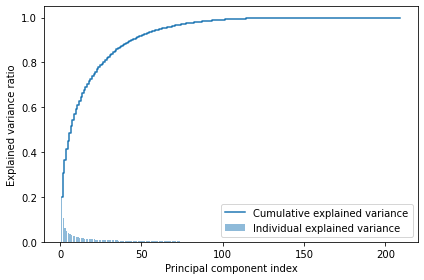

In [52]:
pca = PCA()

# Determine transformed features
df_pca = pca.fit_transform(df_minmax)

# Determine explained variance using explained_variance_ration_ attribute
exp_var_pca = pca.explained_variance_ratio_

# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
df_cum_sum = pd.DataFrame(cum_sum_eigenvalues)
df_cum_sum.index += 1
display(df_cum_sum)

# Create the visualization plot

plt.bar(range(1,len(exp_var_pca)+1), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1,len(cum_sum_eigenvalues)+1), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Find out what how relavant the features are for the PC's 

,1,2,3,4,5,6,7,8,9,10,...,36,37,38,39,40,41,42,43,44,45
MaxAbsEStateIndex,0.135796,0.013495,0.095551,0.173409,0.098700,0.089320,0.045492,0.123615,0.001459,0.141102,...,0.024030,0.031673,0.015056,0.024037,0.010349,0.079578,0.098736,0.059453,0.000761,0.083966
MaxEStateIndex,0.135796,0.013495,0.095551,0.173409,0.098700,0.089320,0.045492,0.123615,0.001459,0.141102,...,0.024030,0.031673,0.015056,0.024037,0.010349,0.079578,0.098736,0.059453,0.000761,0.083966
MinAbsEStateIndex,0.027024,0.112927,0.054959,0.012472,0.005852,0.083798,0.004436,0.006130,0.015162,0.107573,...,0.046117,0.028871,0.089974,0.017372,0.094562,0.027527,0.029943,0.134849,0.071732,0.009047
MinEStateIndex,0.095830,0.089538,0.001337,0.001195,0.038309,0.028659,0.177210,0.000567,0.099049,0.037238,...,0.071405,0.008351,0.060069,0.013439,0.048919,0.004384,0.034712,0.030736,0.002050,0.030795
qed,0.091415,0.085946,0.010616,0.089698,0.118805,0.005294,0.137305,0.068615,0.017883,0.258807,...,0.117511,0.059707,0.228881,0.088208,0.055362,0.092178,0.114879,0.116666,0.017159,0.275548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fr_thiazole,0.004078,0.042715,0.039586,0.016316,0.021713,0.022853,0.026741,0.040805,0.078135,0.047263,...,0.002851,0.098669,0.177498,0.034149,0.025952,0.034303,0.019570,0.083273,0.138172,0.000435
fr_thiocyan,0.002406,0.000536,0.000132,0.001414,0.000730,0.000692,0.002302,0.001638,0.000185,0.002582,...,0.002943,0.000587,0.008096,0.008144,0.000601,0.015506,0.002991,0.000010,0.006943,0.013440
fr_thiophene,0.000085,0.025353,0.066109,0.059559,0.046871,0.033660,0.021526,0.084579,0.117619,0.036416,...,0.018961,0.136195,0.027326,0.056509,0.020405,0.051866,0.082379,0.028661,0.072553,0.169882
fr_unbrch_alkane,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


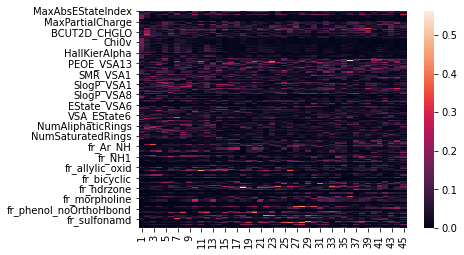

In [108]:
n_components = 45
pca = PCA(n_components = n_components)
components = pca.fit_transform(df_minmax)
df_pc = pd.DataFrame(abs(pca.components_), index=range(1,n_components+1), columns=desc_names).transpose()
display(df_pc)

sn.heatmap(df_pc, annot=False)
plt.show()


Evaluate which features are important per PC

In [110]:
threshold = 0.21
percentage = 95

df_high_value = df_pc[df_pc > threshold]

df_evaluate = df_high_value.transpose()

def show_missing(df):
    """Return a Pandas dataframe describing the contents of a source dataframe including missing values."""
    
    variables = []
    dtypes = []
    count = []
    unique = []
    missing = []
    pc_missing = []
    
    for item in df.columns:
        variables.append(item)
        dtypes.append(df[item].dtype)
        count.append(len(df[item]))
        unique.append(len(df[item].unique()))
        missing.append(df[item].isna().sum())
        pc_missing.append(round((df[item].isna().sum() / len(df[item])) * 100, 2))

    output = pd.DataFrame({
        'variable': variables, 
        'dtype': dtypes,
        'count': count,
        'unique': unique,
        'missing': missing, 
        'pc_missing': pc_missing
    })    
        
    return output

df_missing = show_missing(df_evaluate)
display(df_missing)

df_missing.drop(df_missing[df_missing['pc_missing'] >= percentage ].index, inplace = True)
df_possible_desc = df_high_value.iloc[df_missing.index,]
display(df_possible_desc)
# df_possible_desc.sum(axis=0)

,variable,dtype,count,unique,missing,pc_missing
0,MaxAbsEStateIndex,float64,45,1,45,100.00
1,MaxEStateIndex,float64,45,1,45,100.00
2,MinAbsEStateIndex,float64,45,1,45,100.00
3,MinEStateIndex,float64,45,1,45,100.00
4,qed,float64,45,4,42,93.33
...,...,...,...,...,...,...
204,fr_thiazole,float64,45,6,40,88.89
205,fr_thiocyan,float64,45,1,45,100.00
206,fr_thiophene,float64,45,2,44,97.78
207,fr_unbrch_alkane,float64,45,1,45,100.00


,1,2,3,4,5,6,7,8,9,10,...,36,37,38,39,40,41,42,43,44,45
qed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258807,...,NaN,NaN,0.228881,NaN,NaN,NaN,NaN,NaN,NaN,0.275548
BCUT2D_MWLOW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.223994,NaN,NaN
PEOE_VSA10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.256304,NaN,0.228737,0.308415,0.215515,NaN,NaN,NaN
PEOE_VSA12,NaN,NaN,NaN,NaN,NaN,NaN,0.294663,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PEOE_VSA13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.219176,NaN,0.21242,NaN
SMR_VSA9,NaN,NaN,NaN,NaN,0.230781,NaN,NaN,NaN,0.214187,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SlogP_VSA12,NaN,NaN,NaN,NaN,NaN,0.230278,NaN,0.228667,0.262741,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SlogP_VSA8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.282611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fr_NH1,NaN,NaN,NaN,NaN,NaN,0.290418,NaN,NaN,NaN,NaN,...,NaN,NaN,0.221017,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fr_aniline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
